In [34]:
import matplotlib.pyplot as plt
import numpy as np
from lib import histfit

In [35]:
def get_means_stds(names):
    times = {} 
    diffs = {}
    means = {}
    stds = {}

    for name in names:
        diffs[name] = []
        times[name] = []

        #data_times = open("data/2023-01-16/Time-2023-01-16-"+name+".txt", "r")
        #/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-24
        data_times = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-24/Time-2023-01-24-"+name+".txt", "r")
        N_row = 0

        for row in data_times:
            N_row += 1
            row = row.replace("\n", "")
            row = row.replace(",", ".")
            terms = row.split("\t")
            terms = np.sort([float(terms[term]) for term in range(len(terms))])
            #diffs[name] = diffs[name] + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
            
            for i, term in enumerate(terms):
                if term > 1:
                    times[name].append(term)
                    if i < len(terms)-1 and terms[i+1] > 1:
                        diffs[name].append(terms[i+1] - term)

        if len(times[name]) >= 1:
            means[name] = np.mean(times[name])
            stds[name] = np.std(times[name])/np.sqrt(N_row)#/np.sqrt(len(times[name]))
        else:
            means[name] = 0
            stds[name] = 0
    
    N_tot = sum([len(lista_i) for lista_i in list(times.values())])
    print(N_tot)
    
    return times, diffs, means, stds

#def fit_function(theta):
#    def fun(x):
#        return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
#    return fun

def fit_function(theta):
   if theta[1] <= 0:
      def fun(x):
         return 0
   else:
      def fun(x):
         return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun    

4538


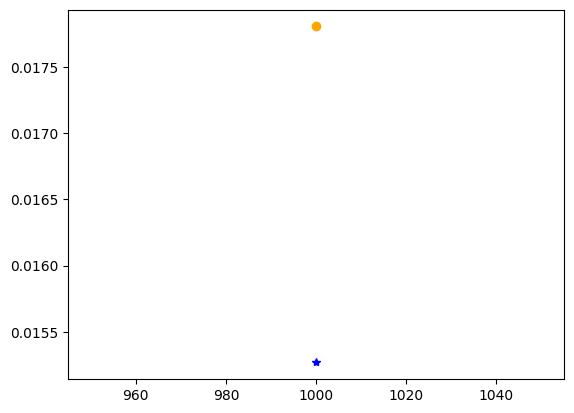

In [46]:
#names = ["20_", "175_", "400_", "500_", "600_", "1000_", "1600_", "1800_", "2100_", "2500_", "3000_"] 
#eval_times = [20, 175, 400, 500, 600, 1000, 1600, 1800, 2100, 2500, 3000]
names = ["LONG_300_1000_6"]#["6_500"]
eval_times = [1000]

times, diffs, means, stds = get_means_stds(names)
stds_fit = []
mean_fit = []

for i, name in enumerate(names):

    bins_range = [8.3,8.5]
    #theta_0 = [8.4, 0.03]
    theta_0 = [np.mean(times[name]), np.std(times[name])]
    n_bins = 50
    min_fit = histfit.hist_fit(times[name], bins_range, n_bins, fit_function, theta_0)
    mean_fit.append(min_fit.x[0])
    stds_fit.append(min_fit.x[1])
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[i]/np.sqrt(10), marker="o", c="orange")
    plt.plot(eval_times[i], stds[name], marker="*", c="blue")
plt.show()

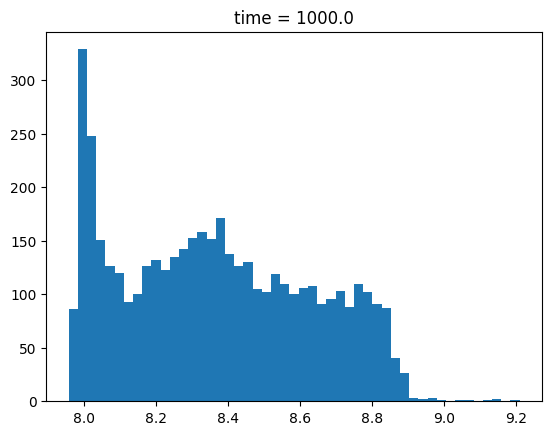

In [47]:
i = 0
name = names[i]
myhist = plt.hist(times[name], bins=np.linspace(min(times[names[0]]), max(times[names[0]]), 50))
plt.title("time = %.1f"%eval_times[i])
plt.show()

In [38]:
len(myhist[0])

24

In [39]:
i = 1
name = names[i]
plt.hist(diffs[name], bins=np.linspace(0, 0.1, 100))
plt.title("time = %.1f"%eval_times[i])
plt.show()

IndexError: list index out of range

305
0.025982204286611656 0.025785954764706385 0.008216294417748314
0.0 0.0 0.0
0.039037844110340045 0.02977221058695604 0.012344850233126406
0.013243170215131286 0.013295426569775039 0.004187858132111693
0.004982499999999668 0.00389413370095215 0.0015756048441787898
0.014212916303137965 0.01408474931462574 0.004494518771125613
0.016713035755612025 0.016838138866895547 0.0052851259603567255
0.014806000000000097 0.016283771319326637 0.004682068303645333
0.05157442456406148 0.03239783576663695 0.01630926506349709
0.019082346553119002 0.019154649963892236 0.0060343678208519295
0.029257571920881287 0.029218316856581227 0.009252056607617255
0.0063217247822269255 0.006558242688750975 0.001999104905256902


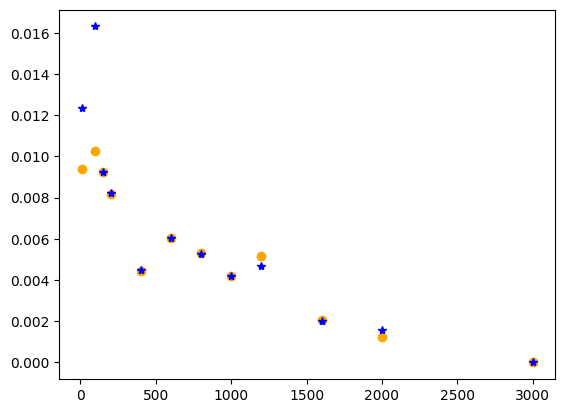

In [ ]:
names = ["0_200", "1_3000", "2_10", "3_1000", "4_2000", "5_400", "6_800", "7_1200", "8_100", "9_600", "10_150", "11_1600"] 
eval_times = [200, 3000, 10, 1000, 2000, 400, 800, 1200, 100, 600, 150, 1600]

times, diffs, means, stds = get_means_stds(names)

#for i, name in enumerate(names):
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
#    plt.plot(eval_times[i], stds[name], marker="o", c="blue")
#plt.show()
stds_fit=[]
for i, name in enumerate(names):

    bins_range = [8.3,8.5]
    #theta_0 = [8.4, 0.03]
    theta_0 = [np.mean(times[name]), np.std(times[name])]
    n_bins = 50
    min_fit = histfit.hist_fit(times[name], bins_range, n_bins, fit_function, theta_0)
    stds_fit.append(min_fit.x[1])
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[i]/np.sqrt(10), marker="o", c="orange")
    plt.plot(eval_times[i], stds[name], marker="*", c="blue")
    #print(theta_0[1], min_fit.x[1], stds[name])
plt.show()

305


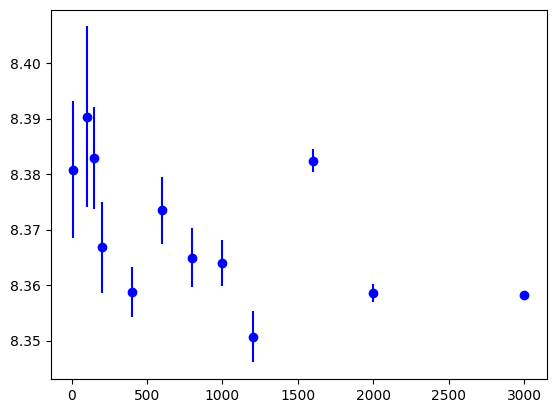

In [ ]:
names = ["0_200", "1_3000", "2_10", "3_1000", "4_2000", "5_400", "6_800", "7_1200", "8_100", "9_600", "10_150", "11_1600"] 
eval_times = [200, 3000, 10, 1000, 2000, 400, 800, 1200, 100, 600, 150, 1600]

times, diffs, means, stds = get_means_stds(names)

for i, name in enumerate(names):
    plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    #plt.plot(eval_times[i], stds[name], marker="o", c="blue")
plt.show()

In [ ]:
from scipy.special import gammaln
from lib import histfit

gammaln(0)

inf

In [ ]:
def fit_function(theta):
   def fun(x):
      return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun

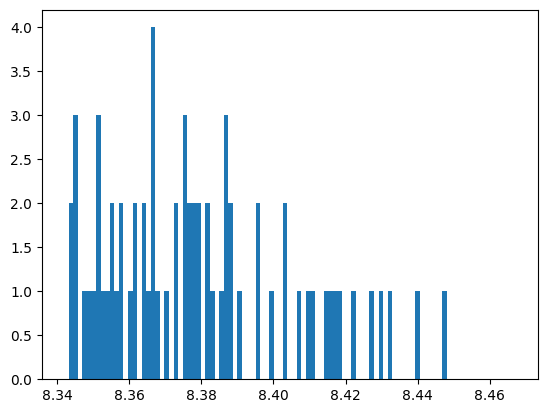

In [ ]:
i = 2
name = names[i]
theta_0 = [np.mean(times[name]), np.std(times[name])]
data = plt.hist(times[name], bins=np.linspace(min(times[names[0]]), max(times[names[0]]), 100))

#min_f = histfit.hist_fit2(data[0], data[1], fit_function, theta_0)
#print(theta_0)
#print(stds[name])
#min_f.x